In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## K-Means clustering


We will work with a toy dataset with only two features. Below we generate the data, we will use `make_blobs` function to generate three  isotropic Gaussian blobs in 2 dimensions.

In [53]:
from sklearn.datasets import make_blobs

In [54]:
X, cluster_labels = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    random_state=0,
)

In [55]:
cluster_labels

array([1, 1, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 2, 3, 0, 0, 1, 0, 3, 0, 0, 1,
       2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 3, 3, 2, 0, 0, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       0, 1, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3,
       1, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 3, 1, 3, 0, 0, 2, 1, 0, 3,
       3, 2, 3, 3, 1, 3, 1, 0, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 0, 3,
       2, 3, 3, 3, 0, 1, 0, 2, 1, 1, 1, 1, 2, 3, 0, 0, 2, 3, 3, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 3,
       0, 3, 3, 3, 1, 1, 1, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 0, 2,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 3, 3, 3,
       0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2,
       2, 1, 3, 3, 0, 1, 0, 0, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 0, 1, 3,
       1, 1, 0, 0, 3, 1, 0, 3, 1, 2, 1, 3, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 1,

Text(0.5, 1.0, '2-dimensional Gaussians')

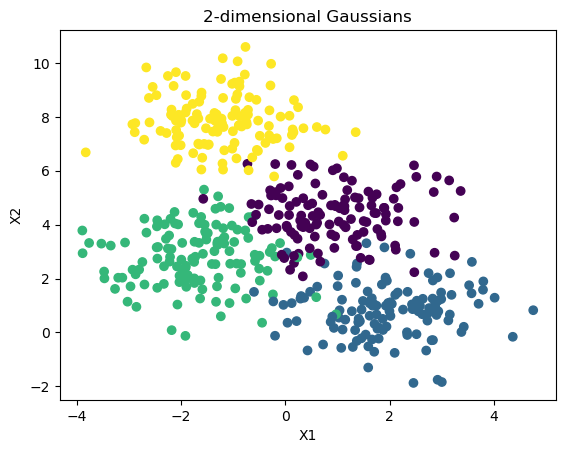

In [56]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2-dimensional Gaussians')

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100)
pred_cluster_labels = kmeans.fit_predict(X)

Now we have a fitted `KMeans` model which has several attributes, one of the very useful ones is `cluster_centers_` which contains the centers of the obtained clusters. 

In [58]:
kmeans.cluster_centers_

array([[-1.11137947,  7.74667035],
       [-0.51367823,  3.51734743],
       [ 1.97983682,  0.91765182]])

Let's plot the data again, this time together with the obtained cluster centers. We have defined a function which plots the data points and colors them according to their assigned clusters. 

Text(0, 0.5, 'X2')

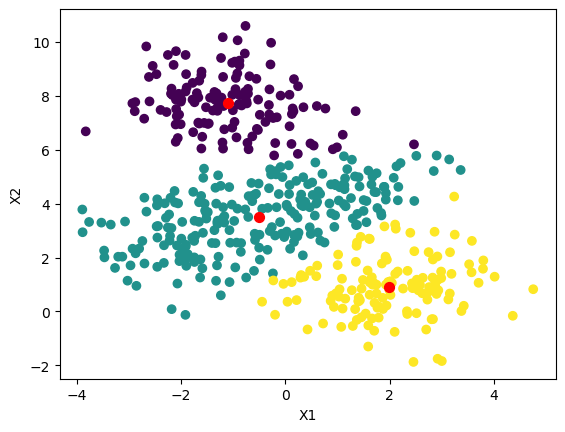

In [59]:
plt.scatter(X[:,0],X[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
plt.xlabel('X1')
plt.ylabel('X2')


In [60]:
kmeans.inertia_

1457.8250546232211

In [61]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

In [62]:
pred_cluster_labels = kmeans.fit_predict(X)

In [63]:
kmeans.inertia_

893.2890226111844

Text(0.5, 1.0, '2-dimensional Gaussians')

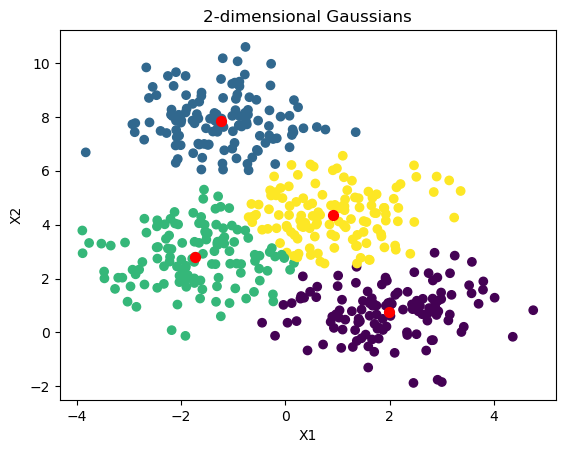

In [64]:
plt.scatter(X[:,0],X[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2-dimensional Gaussians')

# Elbow Method

In [65]:
inertias = np.zeros(25)
for i in range(1, 26):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(X)
    inertias[i-1] = kmeans.inertia_

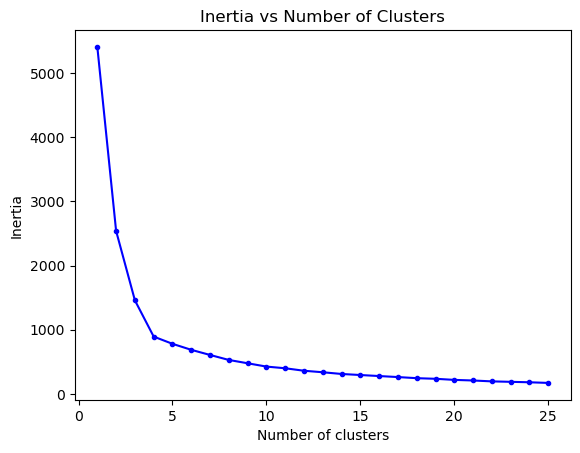

In [66]:
plt.plot(range(1,26), inertias, c='b', marker='.')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

We see that inertia continues to decrease as we increase the number of clusters in the model. In fact, this is always the case! A notable downside of inertia as a model selection method (i.e. for selecting `n_clusters`) is that it continues to decrease with each additional cluster. 

In many cases, however, the inertia decreases most sharply for the first few clusters, and then the improvements begin to taper. In the above plot we can see this after $n=4$. This point is referred to as the "elbow" of the plot, and this point can sometimes be used as the appropriate number of clusters to use. But often in real world data this elbow is not so clearly defined.



## Discussion:
I which condition do you think elbow method could not be appropriate?

Silhouette is much more amenable to comparing models across multiple cluster sizes because it has a fixed scale and won't always improve as `n_clusters` increases. Let's compute the silhouette score for a range of `n_clusters` values for our two-dimensional data.

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
S_scores = []
for n_clusters in range(2, 9):
    km = KMeans(n_clusters=n_clusters)
    
    # Predict the cluster for each data point
    preds = km.fit_predict(X)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, the average silhouette_score is : {}'
          .format(n_clusters, score.round(5)))
    S_scores.append(score)

For n_clusters = 2, the average silhouette_score is : 0.47173
For n_clusters = 3, the average silhouette_score is : 0.46541
For n_clusters = 4, the average silhouette_score is : 0.50103
For n_clusters = 5, the average silhouette_score is : 0.44658
For n_clusters = 6, the average silhouette_score is : 0.41255
For n_clusters = 7, the average silhouette_score is : 0.35031
For n_clusters = 8, the average silhouette_score is : 0.36775


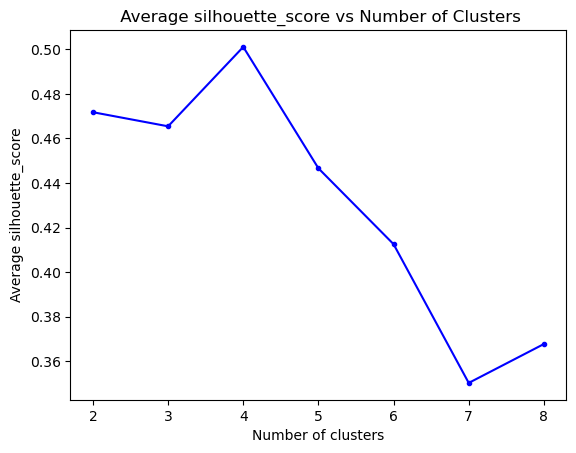

In [69]:
plt.plot(range(2,9), S_scores, c='b', marker='.')
plt.title(" Average silhouette_score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette_score");

Notice that the silhouette score is highest for $n=4$ matches how we constructed this data and what we observed through visual inspection.

For n_clusters = 2 The average silhouette_score is : 0.4579416175733296
For n_clusters = 3 The average silhouette_score is : 0.46541359707472485
For n_clusters = 4 The average silhouette_score is : 0.5004359457183346
For n_clusters = 5 The average silhouette_score is : 0.42369518245773835
For n_clusters = 6 The average silhouette_score is : 0.38628509525535404


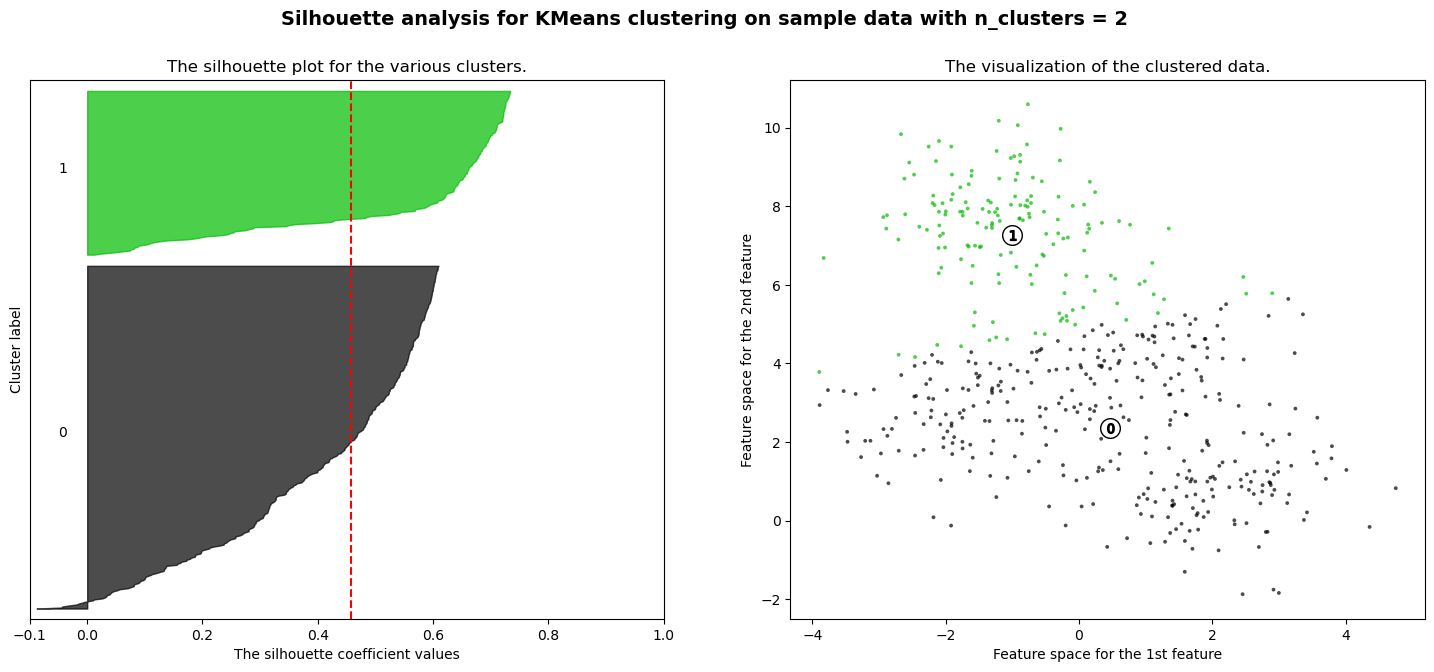

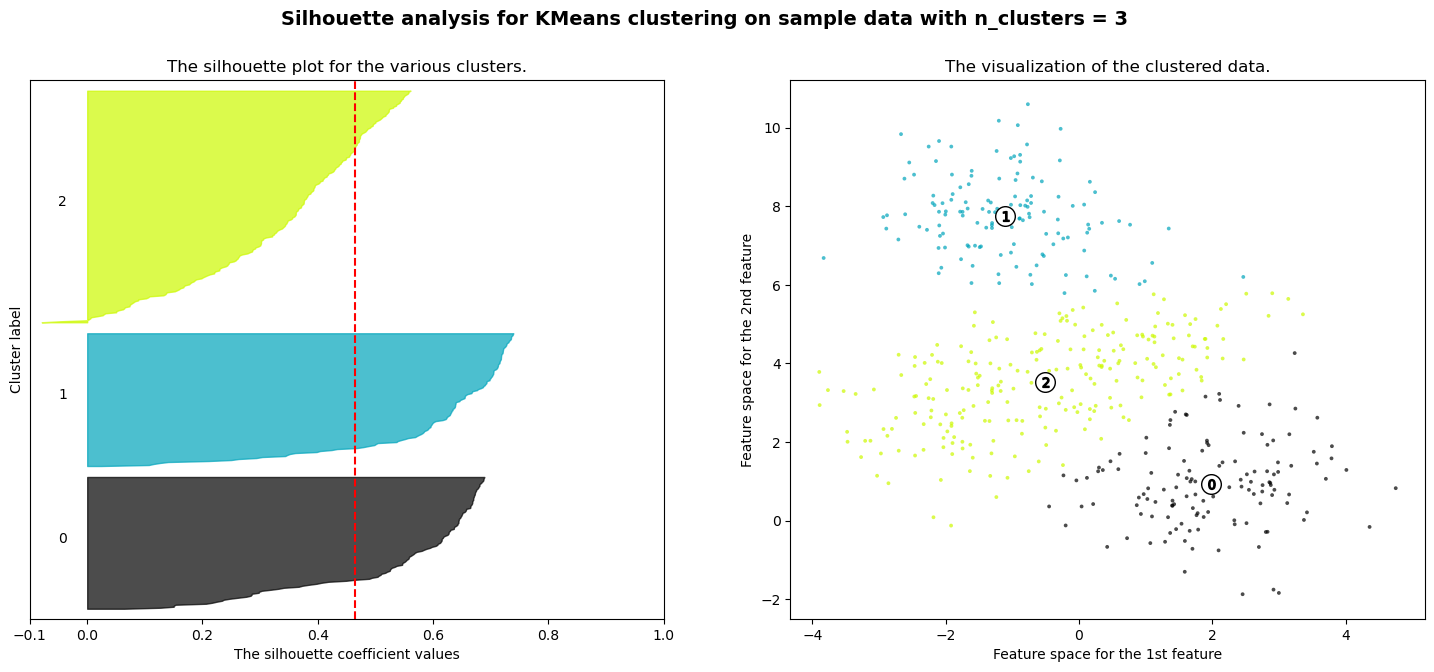

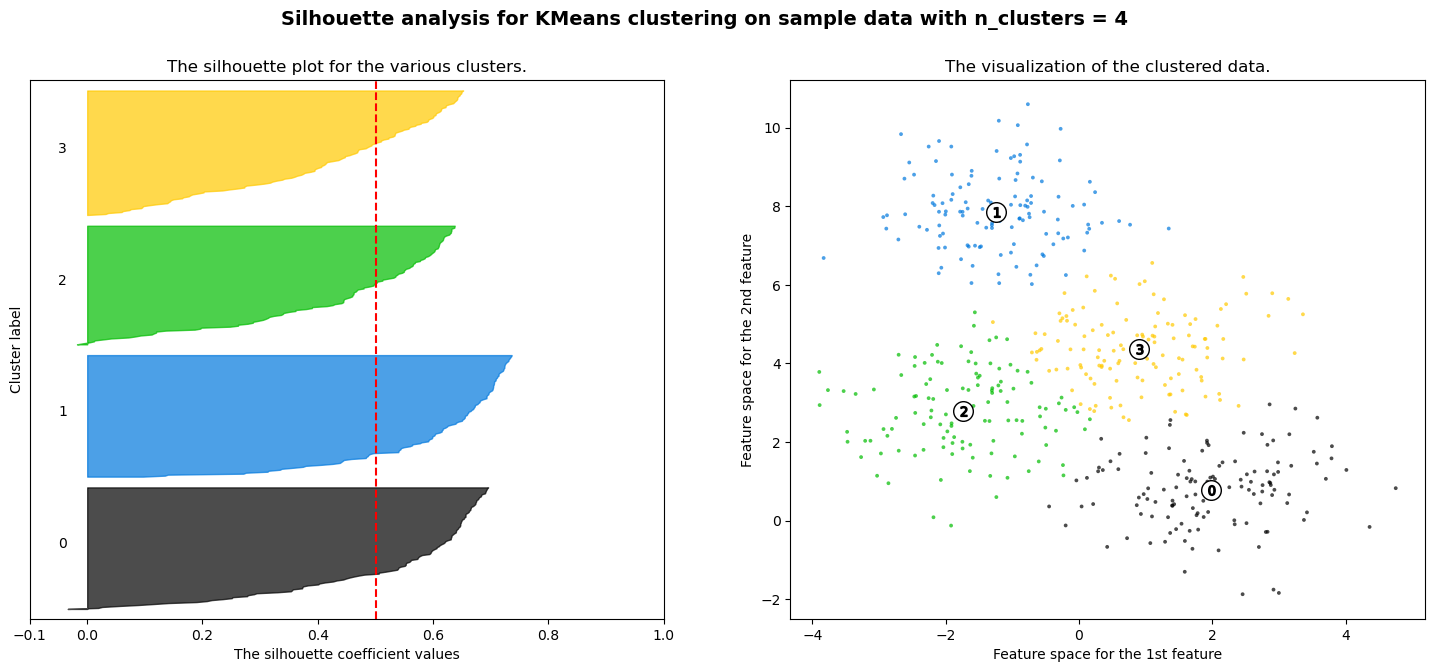

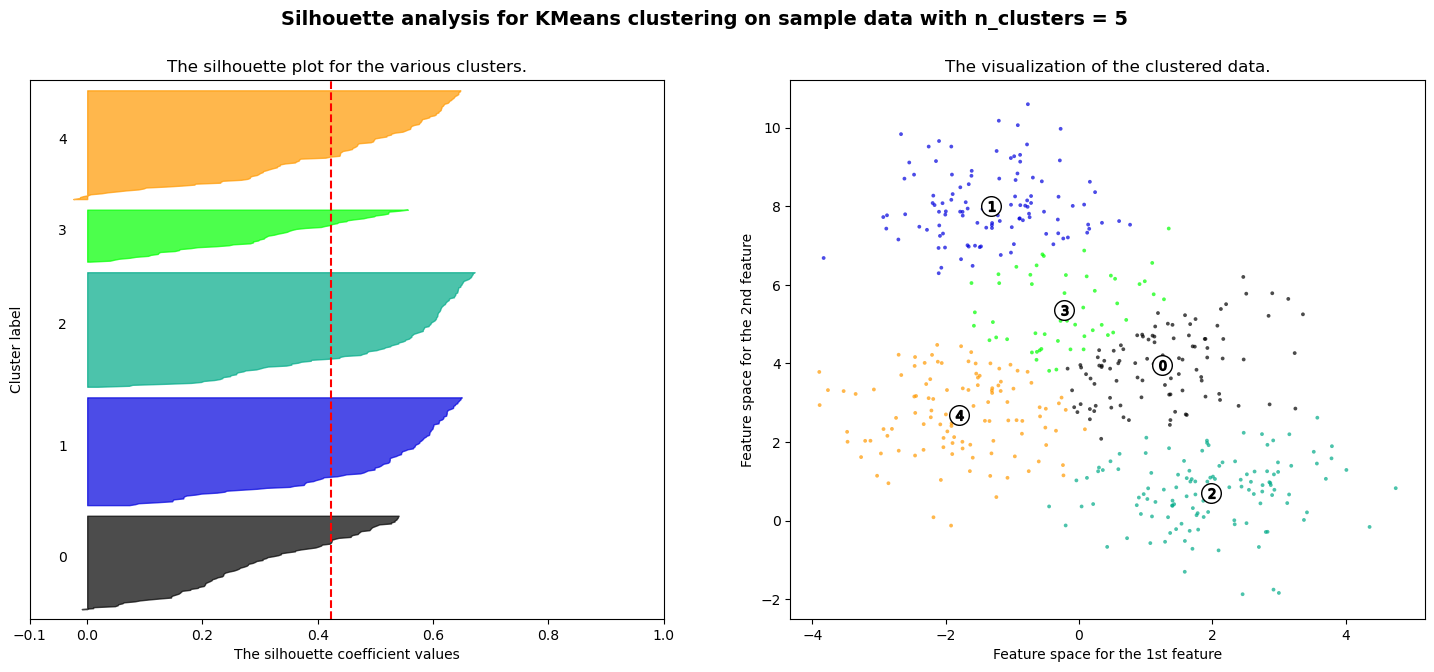

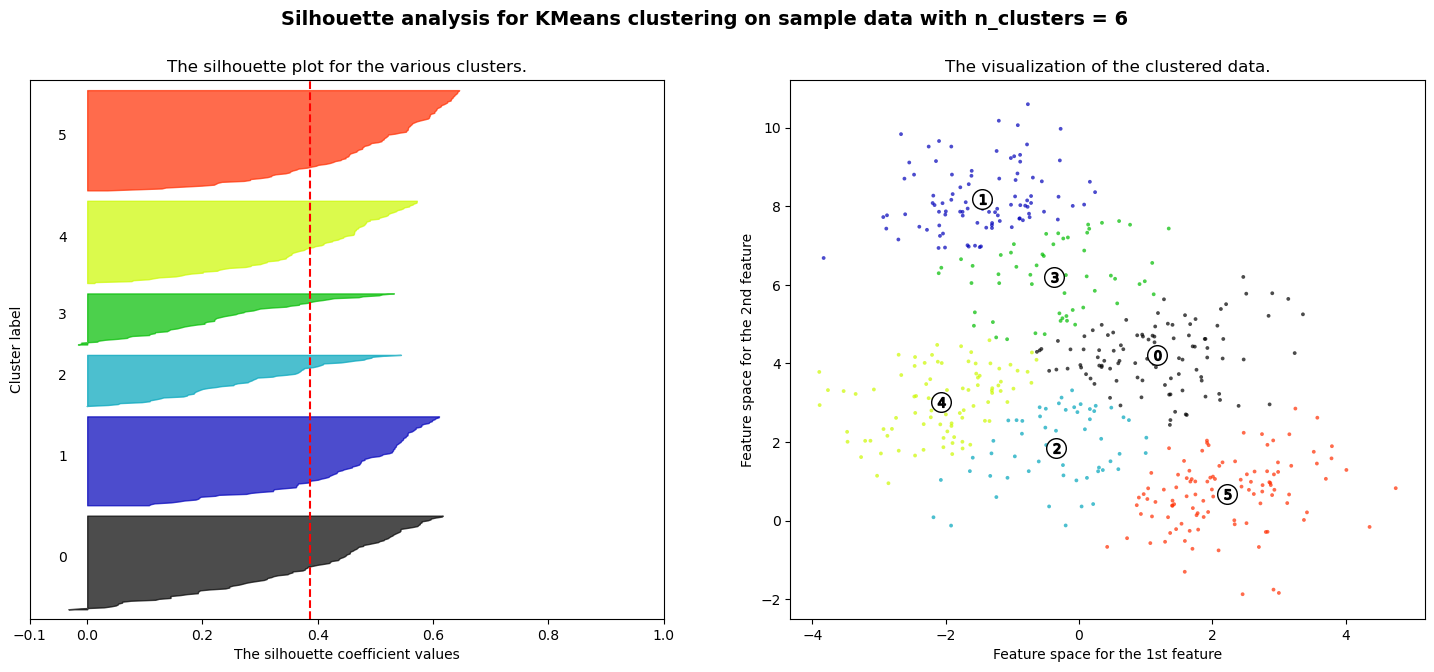

In [73]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    axes[0].set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axes[0].set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    pred_cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, pred_cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, pred_cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[pred_cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axes[0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axes[0].set_title("The silhouette plot for the various clusters.")
    axes[0].set_xlabel("The silhouette coefficient values")
    axes[0].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axes[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    axes[0].set_yticks([])  # Clear the yaxis labels / ticks
    axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(pred_cluster_labels.astype(float) / n_clusters)
    axes[1].scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    axes[1].scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        axes[1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    axes[1].set_title("The visualization of the clustered data.")
    axes[1].set_xlabel("Feature space for the 1st feature")
    axes[1].set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

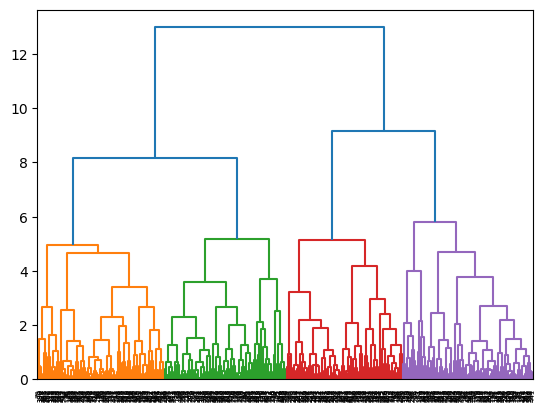

In [78]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'), color_threshold= 6)

In [79]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit_predict(X)
labels = model.labels_

Text(0.5, 1.0, 'Original Data')

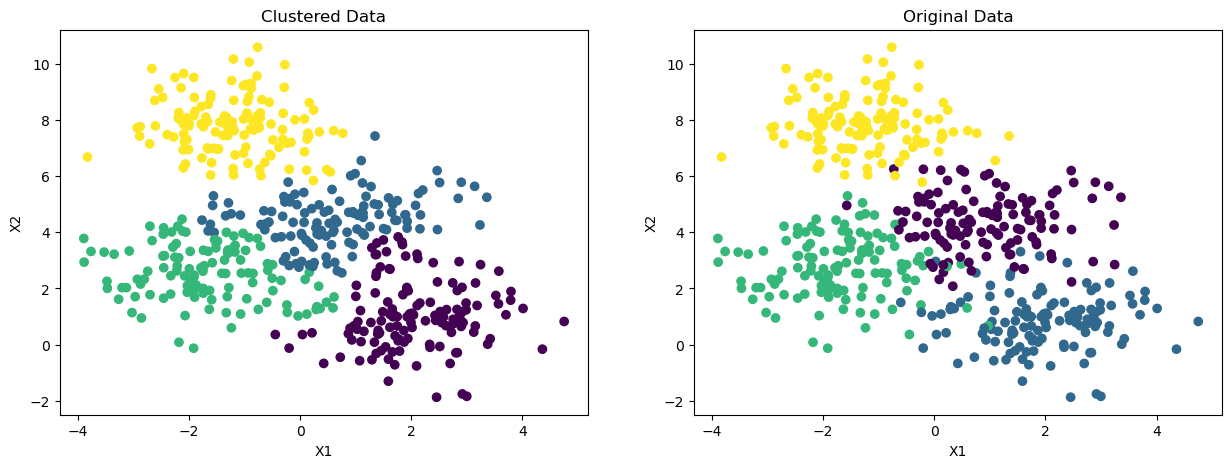

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(X[:,0],X[:,1], c=labels)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_title('Clustered Data')

ax[1].scatter(X[:,0],X[:,1], c=cluster_labels)
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].set_title('Original Data')

In [81]:
S_scores = []
for n_clusters in range(2, 9):
    ag = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    ag.fit_predict(X)
    
    # Predict the cluster for each data point
    preds  = ag.labels_

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, the average silhouette_score is : {}'
          .format(n_clusters, score.round(5)))
    S_scores.append(score)

For n_clusters = 2, the average silhouette_score is : 0.37438
For n_clusters = 3, the average silhouette_score is : 0.39106
For n_clusters = 4, the average silhouette_score is : 0.45357
For n_clusters = 5, the average silhouette_score is : 0.37592
For n_clusters = 6, the average silhouette_score is : 0.33795
For n_clusters = 7, the average silhouette_score is : 0.31497
For n_clusters = 8, the average silhouette_score is : 0.25516


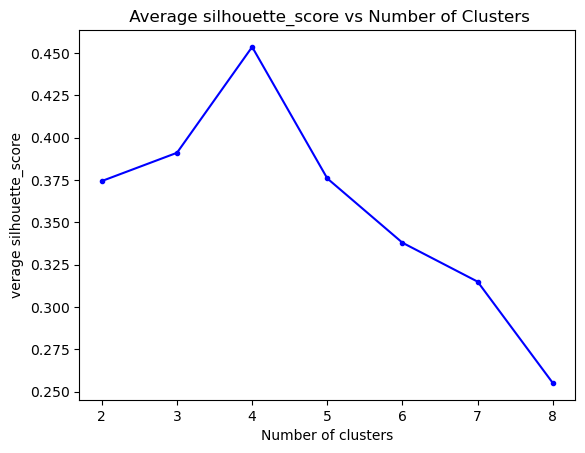

In [257]:
plt.plot(range(2,9), S_scores, c='b', marker='.')
plt.title(" Average silhouette_score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("verage silhouette_score");

In [82]:
X, cluster_labels = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=0,
)

Text(0, 0.5, 'X2')

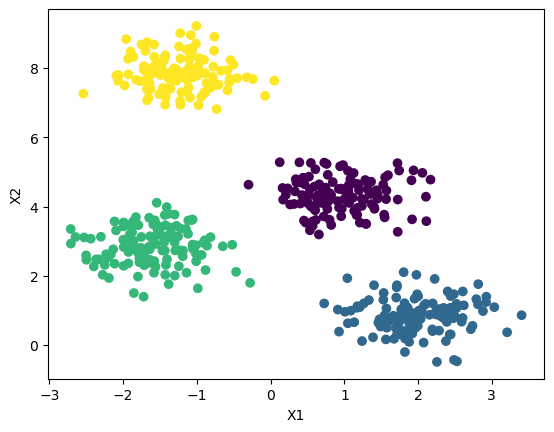

In [83]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')


In [87]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.36, min_samples=13).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 72


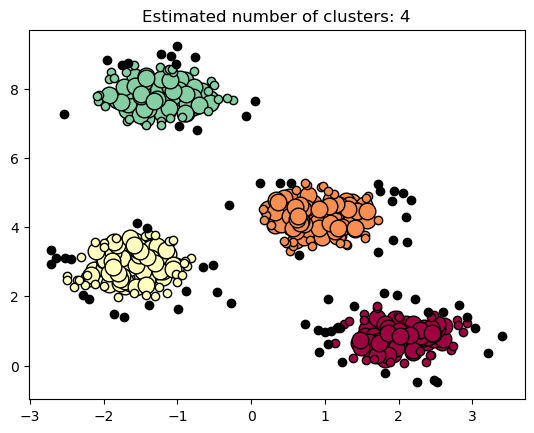

In [88]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [89]:
from sklearn.datasets import make_moons
X, cluster_labels = make_moons(n_samples=500, noise=0.1)


Text(0, 0.5, 'X2')

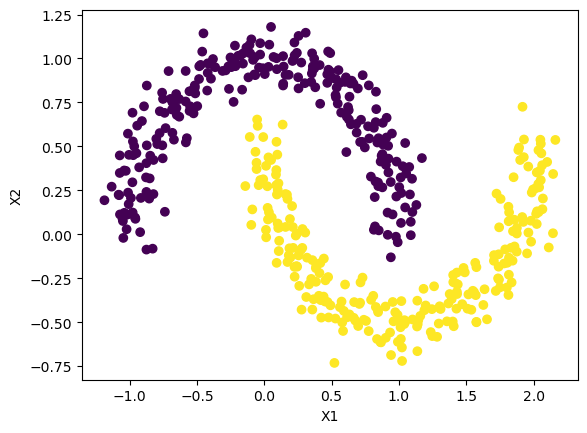

In [90]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

In [91]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.15, min_samples=11).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 15


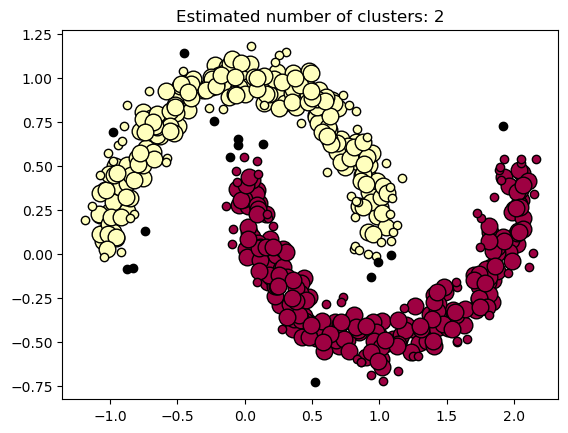

In [92]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

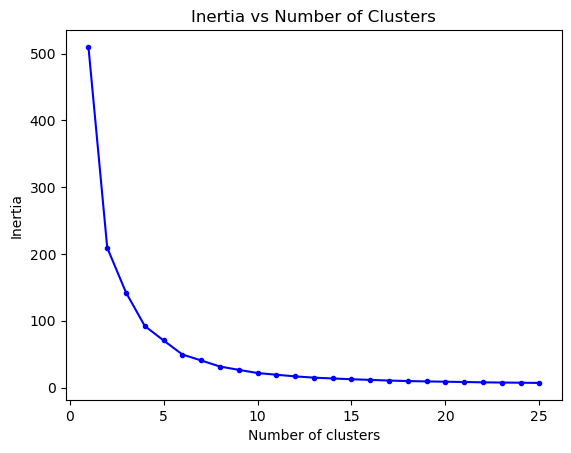

In [93]:
inertias = np.zeros(25)
for i in range(1, 26):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(X)
    inertias[i-1] = kmeans.inertia_
plt.plot(range(1,26), inertias, c='b', marker='.')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");   

Text(0, 0.5, 'X2')

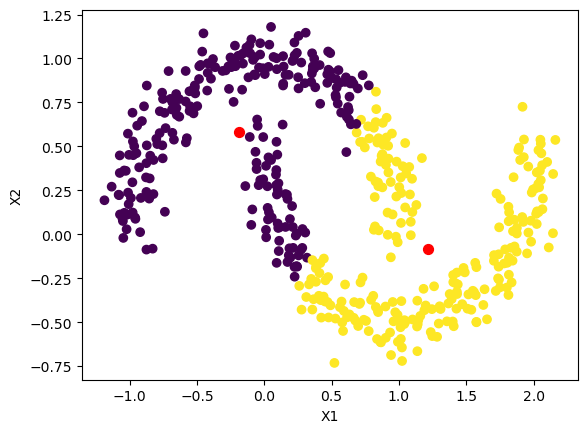

In [94]:
kmeans = KMeans(n_clusters = 2, init='k-means++', max_iter=300, random_state=0)
pred_cluster_labels= kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
plt.xlabel('X1')
plt.ylabel('X2')

In [130]:
from sklearn.datasets import make_circles
X, cluster_labels = make_circles(
    n_samples=1000,noise = 0.08, factor=0.5

)

Text(0, 0.5, 'X2')

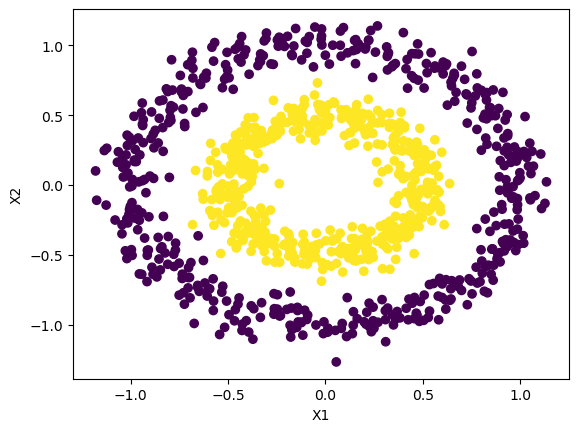

In [131]:
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

In [143]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.11, min_samples=6).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 8


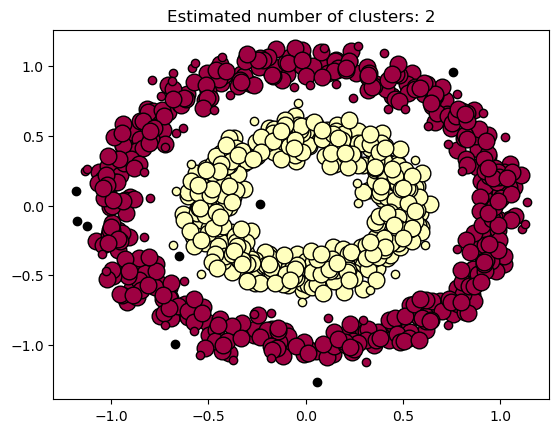

In [144]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Given this example what are the disdvantages of DBSCAN method?